In [1]:
import pandas as pd
df = pd.read_csv('Iris (1).csv')

In [20]:
df.head(55)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_clusters,hc_clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#Unique values show 3 species for our data, so task requires 3 clusters.
#I will apply k-means with 3 clusters, then compare the results with distribution graphs


<AxesSubplot:>

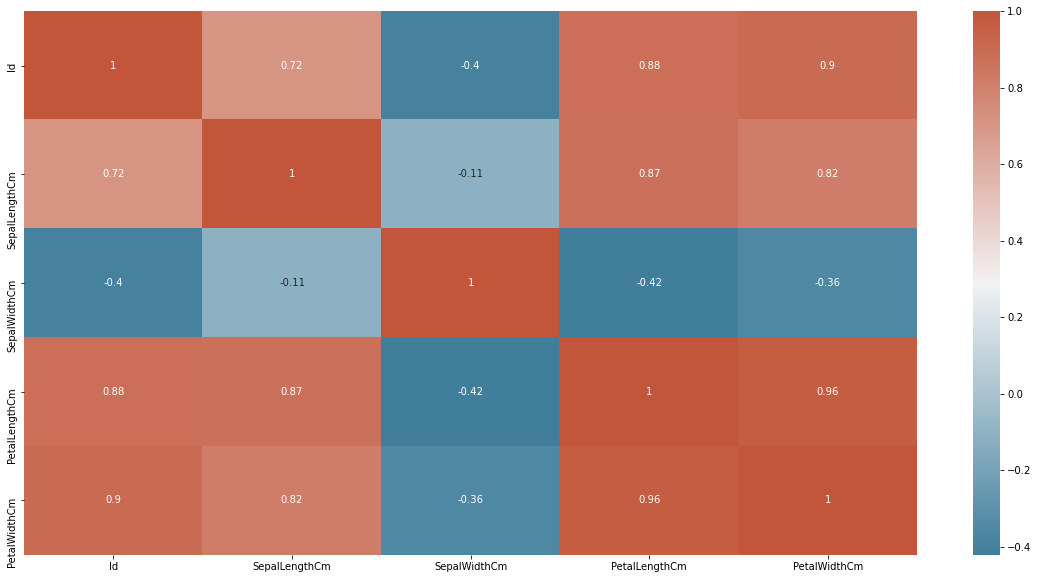

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize = (20,10))  
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(230, 20, as_cmap=True))

## Kmeans

In [9]:
X= df.iloc[:, [1, 2, 3, 4]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

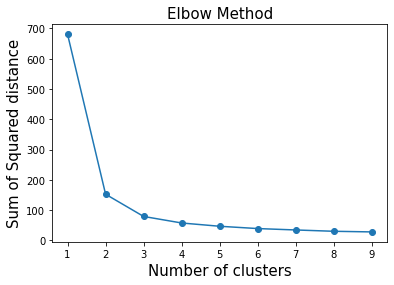

In [10]:
# plot elbow curve

from sklearn.cluster import KMeans
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()
#after 3, we see that distance declines equally, bend looks like to be 3, but can't be seen exactly
#anyhow we are required to do analysis with 3 clusters

In [11]:
#Fitting data for k-means model
k_means=KMeans(n_clusters=3,init = 'k-means++',random_state=123)
k_means.fit(X)
y_pred=k_means.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [12]:
pd.Series(y_pred).value_counts()


2    62
0    50
1    38
dtype: int64

In [13]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

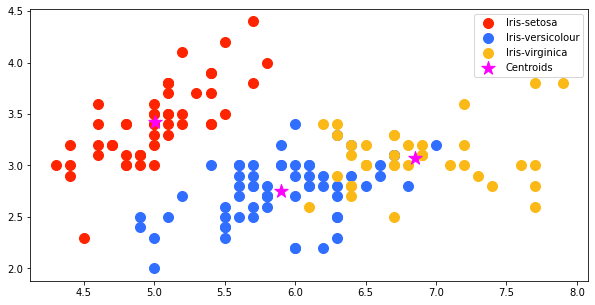

In [14]:
plt.subplots(figsize=(10,5))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = '#FF2400', label = 'Iris-setosa')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = '#306EFF', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = '#FBB917', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 200, c = '#FF00FF',marker = '*', label = 'Centroids')
_ = plt.legend()


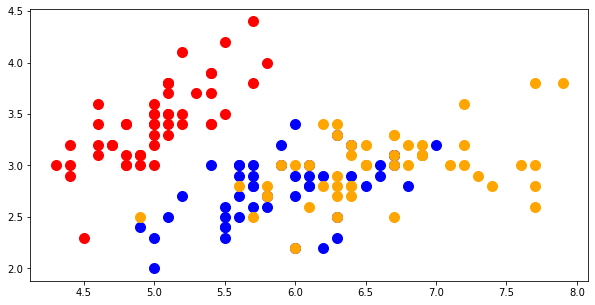

In [15]:
plt.subplots(figsize=(10,5))
#lt.scatter(X, hue='Species')
plt.scatter(X[df['Species'] == 'Iris-setosa', 0], X[df['Species'] == 'Iris-setosa', 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[df['Species'] == 'Iris-versicolor', 0], X[df['Species'] == 'Iris-versicolor', 1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[df['Species'] == 'Iris-virginica', 0], X[df['Species'] == 'Iris-virginica', 1], s = 100, c = 'orange', label = 'Iris-virginica')



# IN order to see how kmeans clusters my data, I also added the same version graph above to compare with original results. As can be seen from above, k-means clusters iris setosa very well, but have some wrong points for others. This can be because of the similar characteristics of other 2 iris species.

In [16]:
# I also added k-means cluster results as a new column to my df
k_label = k_means.labels_
df['k_clusters']=k_label
df.head(30)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


## Hierarchical Clustering

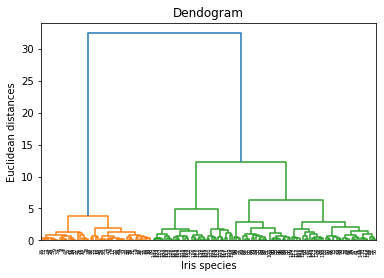

In [17]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

#dendogram
#plt.figure(figsize=(50, 12))
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Iris species')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
# Agglomearative Hierarchical clustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
y_hc=hc.fit_predict(X)


In [19]:
hc_label = hc.labels_
df['hc_clusters']=hc_label
df.head(30)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,k_clusters,hc_clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0,1
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0,1
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0,1
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0,1
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0,1


# Gives almost the same result as in k-means, only 0, 1 and 2 labels differs.